In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pylab as pl
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("/Users/HP/Documents/Python/VeriSetleri/IBM.csv")

In [3]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [5]:
df.drop("Customer", axis=1, inplace=True)

In [6]:
df.drop("Effective To Date", axis=1, inplace=True)

In [7]:
df.drop("Number of Open Complaints", axis=1, inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder

lbe=LabelEncoder()

In [9]:
df["yeni_gender"]=lbe.fit_transform(df["Gender"])

In [10]:
df.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'yeni_gender'],
      dtype='object')

In [11]:
df["yeni_response"]=lbe.fit_transform(df["Response"])

In [12]:
df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,yeni_gender,yeni_response
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,0
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,1,0
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,0,1
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,1,0
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,1,0


In [13]:
df["yeni_state"]=lbe.fit_transform(df["State"])

In [14]:
df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,yeni_gender,yeni_response,yeni_state
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0,4
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0,0
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0,2
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,0,1
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,1,0,1
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,0,1,1
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,1,0,1
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,1,0,1


In [15]:
df["yeni_coverage"]=lbe.fit_transform(df["Coverage"])

In [16]:
df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,yeni_gender,yeni_response,yeni_state,yeni_coverage
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0,4,0
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0,0,1
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0,2,2
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,0,1,0
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,1,0,1,0
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,0,1,1,1
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,1,0,1,1
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,1,0,1,1


In [17]:
df["yeni_education"]=lbe.fit_transform(df["Education"])

In [18]:
df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,yeni_gender,yeni_response,yeni_state,yeni_coverage,yeni_education
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0,4,0,0
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0,0,1,0
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0,2,2,0
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,Offer1,Call Center,529.881344,SUV,Medsize,1,0,1,0,0
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,Offer1,Agent,138.130879,Four-Door Car,Medsize,1,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,Offer2,Web,198.234764,Four-Door Car,Medsize,1,0,1,0,0
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,Offer1,Branch,379.200000,Four-Door Car,Medsize,0,1,1,1,1
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,Offer1,Branch,790.784983,Four-Door Car,Medsize,1,0,1,1,0
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,Offer3,Branch,691.200000,Four-Door Car,Large,1,0,1,1,1


In [19]:
df["yeni_employmentstatus"]=lbe.fit_transform(df["EmploymentStatus"])

In [20]:
df[22:]

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,yeni_gender,yeni_response,yeni_state,yeni_coverage,yeni_education,yeni_employmentstatus
22,Arizona,24127.504020,Yes,Basic,Bachelor,Medical Leave,M,14072,Suburban,Divorced,...,Agent,511.200000,Four-Door Car,Medsize,1,1,0,0,0,2
23,Nevada,2450.190996,No,Basic,Bachelor,Unemployed,F,0,Suburban,Single,...,Branch,554.376763,Four-Door Car,Medsize,0,0,2,0,0,4
24,California,2392.107890,No,Basic,Bachelor,Disabled,F,17870,Suburban,Married,...,Branch,439.200000,Four-Door Car,Medsize,0,0,1,0,0,0
25,Oregon,5802.065978,No,Basic,College,Employed,M,97541,Suburban,Married,...,Call Center,389.185006,Four-Door Car,Large,1,0,3,0,1,1
26,California,3946.372085,No,Premium,Bachelor,Unemployed,F,0,Suburban,Single,...,Agent,799.200000,Four-Door Car,Small,0,0,1,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,Web,198.234764,Four-Door Car,Medsize,1,0,1,0,0,1
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,Branch,379.200000,Four-Door Car,Medsize,0,1,1,1,1,1
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,Branch,790.784983,Four-Door Car,Medsize,1,0,1,1,0,4
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,Branch,691.200000,Four-Door Car,Large,1,0,1,1,1,1


In [21]:
df["yeni_locationcode"]=lbe.fit_transform(df["Location Code"])

In [22]:
df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Total Claim Amount,Vehicle Class,Vehicle Size,yeni_gender,yeni_response,yeni_state,yeni_coverage,yeni_education,yeni_employmentstatus,yeni_locationcode
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,384.811147,Two-Door Car,Medsize,0,0,4,0,0,1,1
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,1131.464935,Four-Door Car,Medsize,0,0,0,1,0,4,1
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,566.472247,Two-Door Car,Medsize,0,0,2,2,0,1,1
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,529.881344,SUV,Medsize,1,0,1,0,0,4,1
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,138.130879,Four-Door Car,Medsize,1,0,4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,198.234764,Four-Door Car,Medsize,1,0,1,0,0,1,2
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,379.200000,Four-Door Car,Medsize,0,1,1,1,1,1,1
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,790.784983,Four-Door Car,Medsize,1,0,1,1,0,4,1
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,691.200000,Four-Door Car,Large,1,0,1,1,1,1,1


In [23]:
df["yeni_martialstatus"]=lbe.fit_transform(df["Marital Status"])

In [24]:
df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Vehicle Class,Vehicle Size,yeni_gender,yeni_response,yeni_state,yeni_coverage,yeni_education,yeni_employmentstatus,yeni_locationcode,yeni_martialstatus
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,Two-Door Car,Medsize,0,0,4,0,0,1,1,1
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,Four-Door Car,Medsize,0,0,0,1,0,4,1,2
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,Two-Door Car,Medsize,0,0,2,2,0,1,1,1
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,SUV,Medsize,1,0,1,0,0,4,1,1
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,Four-Door Car,Medsize,1,0,4,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,Four-Door Car,Medsize,1,0,1,0,0,1,2,1
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,Four-Door Car,Medsize,0,1,1,1,1,1,1,0
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,Four-Door Car,Medsize,1,0,1,1,0,4,1,2
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,Four-Door Car,Large,1,0,1,1,1,1,1,1


In [25]:
df["yeni_policytype"]=lbe.fit_transform(df["Policy Type"])

In [26]:
df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Vehicle Size,yeni_gender,yeni_response,yeni_state,yeni_coverage,yeni_education,yeni_employmentstatus,yeni_locationcode,yeni_martialstatus,yeni_policytype
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,Medsize,0,0,4,0,0,1,1,1,0
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,Medsize,0,0,0,1,0,4,1,2,1
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,Medsize,0,0,2,2,0,1,1,1,1
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,Medsize,1,0,1,0,0,4,1,1,0
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,Medsize,1,0,4,0,0,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,Medsize,1,0,1,0,0,1,2,1,1
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,Medsize,0,1,1,1,1,1,1,0,0
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,Medsize,1,0,1,1,0,4,1,2,0
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,Large,1,0,1,1,1,1,1,1,1


In [27]:
df["yeni_policy"]=lbe.fit_transform(df["Policy"])

In [28]:
df["Policy"][50:]

50       Personal L2
51      Corporate L1
52        Special L1
53       Personal L3
54       Personal L2
            ...     
9129     Personal L1
9130    Corporate L3
9131    Corporate L2
9132     Personal L2
9133    Corporate L3
Name: Policy, Length: 9084, dtype: object

In [29]:
df["yeni_policy"][50:]

50      4
51      0
52      6
53      5
54      4
       ..
9129    3
9130    2
9131    1
9132    4
9133    2
Name: yeni_policy, Length: 9084, dtype: int32

In [30]:
df["yeni_renewoffertype"]=lbe.fit_transform(df["Renew Offer Type"])

In [31]:
df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,yeni_response,yeni_state,yeni_coverage,yeni_education,yeni_employmentstatus,yeni_locationcode,yeni_martialstatus,yeni_policytype,yeni_policy,yeni_renewoffertype
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,0,4,0,0,1,1,1,0,2,0
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,0,0,1,0,4,1,2,1,5,2
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,0,2,2,0,1,1,1,1,5,0
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,0,1,0,0,4,1,1,0,1,0
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,0,4,0,0,1,0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,0,1,0,0,1,2,1,1,3,1
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,1,1,1,1,1,1,0,0,2,0
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,0,1,1,0,4,1,2,0,1,0
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,0,1,1,1,1,1,1,1,4,2


In [32]:
df["yeni_saleschannel"]=lbe.fit_transform(df["Sales Channel"])

In [33]:
df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,yeni_state,yeni_coverage,yeni_education,yeni_employmentstatus,yeni_locationcode,yeni_martialstatus,yeni_policytype,yeni_policy,yeni_renewoffertype,yeni_saleschannel
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,4,0,0,1,1,1,0,2,0,0
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,0,1,0,4,1,2,1,5,2,0
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,2,2,0,1,1,1,1,5,0,0
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,1,0,0,4,1,1,0,1,0,2
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,4,0,0,1,0,2,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,1,0,0,1,2,1,1,3,1,3
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,1,1,1,1,1,0,0,2,0,1
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,1,1,0,4,1,2,0,1,0,1
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,1,1,1,1,1,1,1,4,2,1


In [34]:
df["yeni_vehicleclass"]=lbe.fit_transform(df["Vehicle Class"])

In [35]:
df["yeni_vehicleclass"][180:]

180     0
181     1
182     0
183     0
184     3
       ..
9129    0
9130    0
9131    0
9132    0
9133    5
Name: yeni_vehicleclass, Length: 8954, dtype: int32

In [36]:
df["Vehicle Class"][180:]

180     Four-Door Car
181        Luxury Car
182     Four-Door Car
183     Four-Door Car
184               SUV
            ...      
9129    Four-Door Car
9130    Four-Door Car
9131    Four-Door Car
9132    Four-Door Car
9133     Two-Door Car
Name: Vehicle Class, Length: 8954, dtype: object

In [37]:
df["yeni_vehiclesize"]=lbe.fit_transform(df["Vehicle Size"])

In [38]:
df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,yeni_education,yeni_employmentstatus,yeni_locationcode,yeni_martialstatus,yeni_policytype,yeni_policy,yeni_renewoffertype,yeni_saleschannel,yeni_vehicleclass,yeni_vehiclesize
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,0,1,1,1,0,2,0,0,5,1
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,0,4,1,2,1,5,2,0,0,1
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,0,1,1,1,1,5,0,0,5,1
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,0,4,1,1,0,1,0,2,3,1
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,0,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,0,1,2,1,1,3,1,3,0,1
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,1,1,1,0,0,2,0,1,0,1
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,0,4,1,2,0,1,0,1,0,1
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,1,1,1,1,1,4,2,1,0,0


Text(0.5, 1.0, 'Customer Lifetime Value')

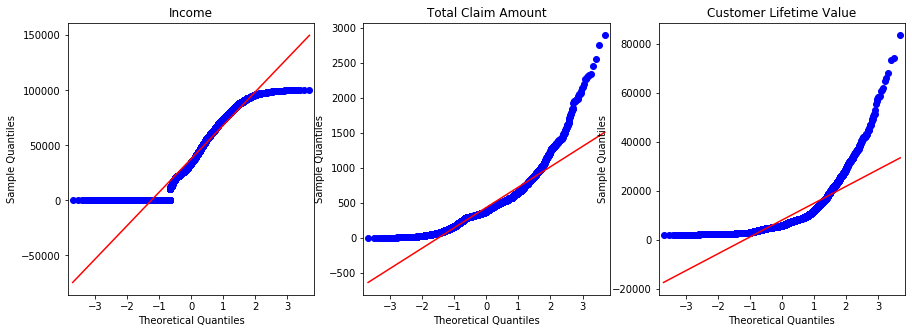

In [39]:
# 3 QQ grafiği tek alanda çizdiriyoruz
import statsmodels.api as sm
fig, (ax, ax2, ax3) = plt.subplots(ncols=3,figsize=(15, 5))

sm.qqplot(df.Income, line = "s", ax = ax)
ax.set_title("Income")

sm.qqplot(df["Total Claim Amount"], line = "s", ax = ax2)
ax2.set_title("Total Claim Amount")

sm.qqplot(df["Customer Lifetime Value"], line = "s", ax = ax3)
ax3.set_title("Customer Lifetime Value")



In [40]:
df["yeni_Income"]=df["Income"]+1

In [41]:
df


,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,yeni_employmentstatus,yeni_locationcode,yeni_martialstatus,yeni_policytype,yeni_policy,yeni_renewoffertype,yeni_saleschannel,yeni_vehicleclass,yeni_vehiclesize,yeni_Income
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,1,1,1,0,2,0,0,5,1,56275
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,4,1,2,1,5,2,0,0,1,1
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,1,1,1,1,5,0,0,5,1,48768
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,4,1,1,0,1,0,2,3,1,1
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,1,0,2,1,3,0,0,0,1,43837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,1,2,1,1,3,1,3,0,1,71942
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,1,1,0,0,2,0,1,0,1,21605
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,4,1,2,0,1,0,1,0,1,1
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,1,1,1,1,4,2,1,0,0,21942


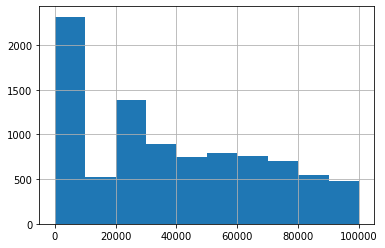

In [42]:
df.Income.hist() #öncesi

In [43]:
df_log_transformed = np.log10(df["yeni_Income"])

In [44]:
df["yeni_Income"]=df_log_transformed

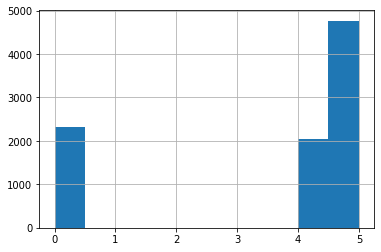

In [45]:
df.yeni_Income.hist() #sonrası

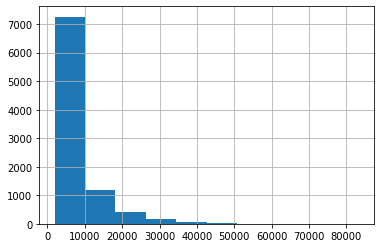

In [46]:
df["Customer Lifetime Value"].hist() #öncesi

In [47]:
df_log_transformed = np.log10(df["Customer Lifetime Value"])

In [48]:
df["yeni_CustomerLifetimeValue"]=df_log_transformed

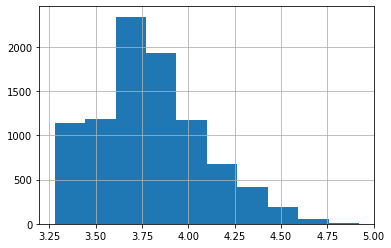

In [49]:
df.yeni_CustomerLifetimeValue.hist() #sonrası

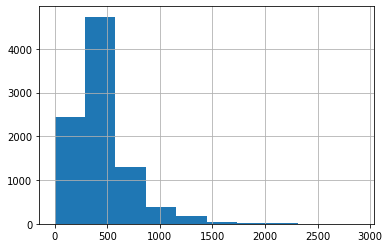

In [50]:
df["Total Claim Amount"].hist() #öncesi

In [51]:
df_log_transformed = np.log10(df["Total Claim Amount"])

In [52]:
df["yeni_TotalClaimAmount"]=df_log_transformed

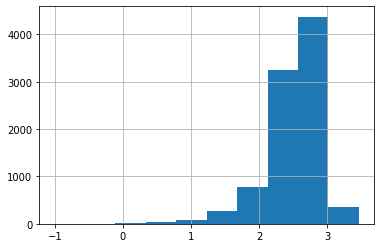

In [53]:
df["yeni_TotalClaimAmount"].hist()

Text(0.5, 1.0, 'yeni_CustomerLifetimeValue')

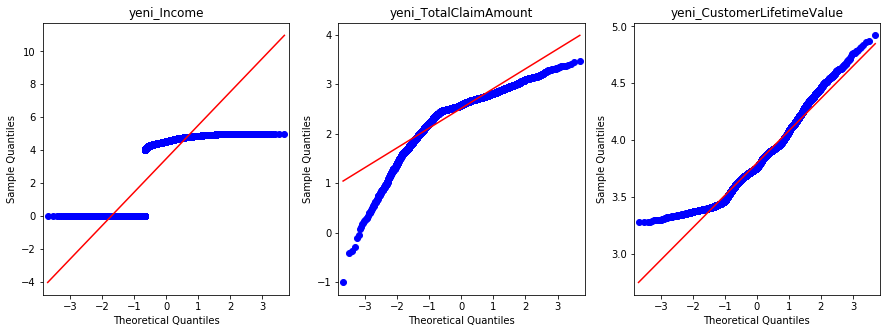

In [54]:
import statsmodels.api as sm
fig, (ax, ax2, ax3) = plt.subplots(ncols=3,figsize=(15, 5))

sm.qqplot(df.yeni_Income, line = "s", ax = ax)
ax.set_title("yeni_Income")

sm.qqplot(df["yeni_TotalClaimAmount"], line = "s", ax = ax2)
ax2.set_title("yeni_TotalClaimAmount")

sm.qqplot(df["yeni_CustomerLifetimeValue"], line = "s", ax = ax3)
ax3.set_title("yeni_CustomerLifetimeValue")

In [55]:
df.drop("Customer Lifetime Value", axis=1, inplace=True)
df.drop("Income", axis=1, inplace=True)
df.drop("Total Claim Amount", axis=1, inplace=True)

In [56]:
df1=df.select_dtypes(include=["float64","int64"])

In [57]:
df1.columns

Index(['Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Policies', 'yeni_Income',
       'yeni_CustomerLifetimeValue', 'yeni_TotalClaimAmount'],
      dtype='object')

In [58]:
##Robust Mahalonibis Distance
def robust_mahalanobis_method(df1):
    #Minimum covariance determinant
    rng = np.random.RandomState(0)
    real_cov = np.cov(df1.values.T)
    X = rng.multivariate_normal(mean=np.mean(df1, axis=0), cov=real_cov, size=9134)
    cov = MinCovDet(random_state=0).fit(X)
    mcd = cov.covariance_ #robust covariance metric
    robust_mean = cov.location_  #robust mean
    inv_covmat = sp.linalg.inv(mcd) #inverse covariance metric
    x_minus_mu=df1-robust_mean
    left_term=np.dot(x_minus_mu, inv_covmat)
    mahal=np.dot(left_term, x_minus_mu.T)
    md=np.sqrt(mahal.diagonal())
    outlier = []
    C = np.sqrt(chi2.ppf((1-0.001), 7))#degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md
    

In [59]:
outliers_mahal_rob, md_rb = robust_mahalanobis_method(df1=df1)

In [60]:
md_rb

array([2.96650657, 2.95738143, 1.65828014, ..., 2.25099375, 2.79833577,
       3.01479217])

In [61]:
df1

,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,yeni_Income,yeni_CustomerLifetimeValue,yeni_TotalClaimAmount
0,69,32,5,1,4.750316,3.441462,2.585248
1,94,13,42,8,0.000000,3.843827,3.053641
2,108,18,38,2,4.688135,4.110166,2.753179
3,106,18,65,7,0.000000,3.883426,2.724179
4,73,12,44,1,4.641841,3.449277,2.140291
...,...,...,...,...,...,...,...
9129,73,18,89,2,4.856983,4.369327,2.297180
9130,79,14,28,1,4.334554,3.490873,2.578868
9131,85,9,37,2,0.000000,3.911897,2.898058
9132,96,34,3,3,4.341276,3.876474,2.839604


In [62]:
outliers_mahal_rob


[31,
 45,
 71,
 129,
 153,
 196,
 248,
 404,
 425,
 496,
 510,
 601,
 633,
 664,
 716,
 741,
 755,
 790,
 832,
 872,
 888,
 926,
 982,
 1010,
 1011,
 1109,
 1166,
 1221,
 1237,
 1292,
 1300,
 1316,
 1328,
 1383,
 1473,
 1516,
 1552,
 1610,
 1796,
 1803,
 1852,
 1861,
 1881,
 1907,
 1974,
 2065,
 2208,
 2225,
 2294,
 2305,
 2334,
 2504,
 2695,
 2895,
 2923,
 3067,
 3234,
 3469,
 3475,
 3505,
 3561,
 3593,
 3723,
 3760,
 3881,
 3923,
 3932,
 3981,
 4070,
 4086,
 4115,
 4126,
 4164,
 4265,
 4268,
 4277,
 4298,
 4354,
 4533,
 4635,
 4679,
 4689,
 4711,
 4719,
 4888,
 4915,
 4930,
 4938,
 5003,
 5074,
 5197,
 5216,
 5234,
 5239,
 5260,
 5351,
 5372,
 5543,
 5554,
 5597,
 5659,
 5699,
 5716,
 5827,
 5833,
 5884,
 5906,
 5942,
 5965,
 6159,
 6177,
 6182,
 6205,
 6231,
 6288,
 6516,
 6534,
 6626,
 6654,
 6872,
 6905,
 7004,
 7012,
 7127,
 7147,
 7283,
 7308,
 7370,
 7398,
 7408,
 7455,
 7457,
 7632,
 7725,
 7741,
 7784,
 7816,
 7835,
 7901,
 7990,
 8099,
 8147,
 8167,
 8206,
 8220,
 8352,
 845

In [63]:
df1 = df1.drop(df1.index[outliers_mahal_rob]).reset_index(drop = True)
df = df.drop(df.index[outliers_mahal_rob]).reset_index(drop = True)

In [64]:
df1

,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,yeni_Income,yeni_CustomerLifetimeValue,yeni_TotalClaimAmount
0,69,32,5,1,4.750316,3.441462,2.585248
1,94,13,42,8,0.000000,3.843827,3.053641
2,108,18,38,2,4.688135,4.110166,2.753179
3,106,18,65,7,0.000000,3.883426,2.724179
4,73,12,44,1,4.641841,3.449277,2.140291
...,...,...,...,...,...,...,...
8971,73,18,89,2,4.856983,4.369327,2.297180
8972,79,14,28,1,4.334554,3.490873,2.578868
8973,85,9,37,2,0.000000,3.911897,2.898058
8974,96,34,3,3,4.341276,3.876474,2.839604


In [65]:
df

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,...,yeni_martialstatus,yeni_policytype,yeni_policy,yeni_renewoffertype,yeni_saleschannel,yeni_vehicleclass,yeni_vehiclesize,yeni_Income,yeni_CustomerLifetimeValue,yeni_TotalClaimAmount
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,69,32,...,1,0,2,0,0,5,1,4.750316,3.441462,2.585248
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,94,13,...,2,1,5,2,0,0,1,0.000000,3.843827,3.053641
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,108,18,...,1,1,5,0,0,5,1,4.688135,4.110166,2.753179
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,106,18,...,1,0,1,0,2,3,1,0.000000,3.883426,2.724179
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,73,12,...,2,1,3,0,0,0,1,4.641841,3.449277,2.140291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,California,No,Basic,Bachelor,Employed,M,Urban,Married,73,18,...,1,1,3,1,3,0,1,4.856983,4.369327,2.297180
8972,California,Yes,Extended,College,Employed,F,Suburban,Divorced,79,14,...,0,0,2,0,1,0,1,4.334554,3.490873,2.578868
8973,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,85,9,...,2,0,1,0,1,0,1,0.000000,3.911897,2.898058
8974,California,No,Extended,College,Employed,M,Suburban,Married,96,34,...,1,1,4,2,1,0,0,4.341276,3.876474,2.839604


In [66]:
Sayısal_df=df.iloc[:,8:]

In [67]:
Sayısal_df

,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,...,yeni_martialstatus,yeni_policytype,yeni_policy,yeni_renewoffertype,yeni_saleschannel,yeni_vehicleclass,yeni_vehiclesize,yeni_Income,yeni_CustomerLifetimeValue,yeni_TotalClaimAmount
0,69,32,5,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,...,1,0,2,0,0,5,1,4.750316,3.441462,2.585248
1,94,13,42,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,...,2,1,5,2,0,0,1,0.000000,3.843827,3.053641
2,108,18,38,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,...,1,1,5,0,0,5,1,4.688135,4.110166,2.753179
3,106,18,65,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,...,1,0,1,0,2,3,1,0.000000,3.883426,2.724179
4,73,12,44,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,...,2,1,3,0,0,0,1,4.641841,3.449277,2.140291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,73,18,89,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,...,1,1,3,1,3,0,1,4.856983,4.369327,2.297180
8972,79,14,28,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,...,0,0,2,0,1,0,1,4.334554,3.490873,2.578868
8973,85,9,37,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,...,2,0,1,0,1,0,1,0.000000,3.911897,2.898058
8974,96,34,3,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,...,1,1,4,2,1,0,0,4.341276,3.876474,2.839604


In [68]:
Sayısal_df.columns

Index(['Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class',
       'Vehicle Size', 'yeni_gender', 'yeni_response', 'yeni_state',
       'yeni_coverage', 'yeni_education', 'yeni_employmentstatus',
       'yeni_locationcode', 'yeni_martialstatus', 'yeni_policytype',
       'yeni_policy', 'yeni_renewoffertype', 'yeni_saleschannel',
       'yeni_vehicleclass', 'yeni_vehiclesize', 'yeni_Income',
       'yeni_CustomerLifetimeValue', 'yeni_TotalClaimAmount'],
      dtype='object')

In [69]:

Sayısal_df.drop("Policy", axis=1, inplace=True)
Sayısal_df.drop("Renew Offer Type", axis=1, inplace=True)
Sayısal_df.drop("Sales Channel", axis=1, inplace=True)


In [70]:
Sayısal_df

,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,Policy Type,Vehicle Class,Vehicle Size,yeni_gender,yeni_response,yeni_state,...,yeni_martialstatus,yeni_policytype,yeni_policy,yeni_renewoffertype,yeni_saleschannel,yeni_vehicleclass,yeni_vehiclesize,yeni_Income,yeni_CustomerLifetimeValue,yeni_TotalClaimAmount
0,69,32,5,1,Corporate Auto,Two-Door Car,Medsize,0,0,4,...,1,0,2,0,0,5,1,4.750316,3.441462,2.585248
1,94,13,42,8,Personal Auto,Four-Door Car,Medsize,0,0,0,...,2,1,5,2,0,0,1,0.000000,3.843827,3.053641
2,108,18,38,2,Personal Auto,Two-Door Car,Medsize,0,0,2,...,1,1,5,0,0,5,1,4.688135,4.110166,2.753179
3,106,18,65,7,Corporate Auto,SUV,Medsize,1,0,1,...,1,0,1,0,2,3,1,0.000000,3.883426,2.724179
4,73,12,44,1,Personal Auto,Four-Door Car,Medsize,1,0,4,...,2,1,3,0,0,0,1,4.641841,3.449277,2.140291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,73,18,89,2,Personal Auto,Four-Door Car,Medsize,1,0,1,...,1,1,3,1,3,0,1,4.856983,4.369327,2.297180
8972,79,14,28,1,Corporate Auto,Four-Door Car,Medsize,0,1,1,...,0,0,2,0,1,0,1,4.334554,3.490873,2.578868
8973,85,9,37,2,Corporate Auto,Four-Door Car,Medsize,1,0,1,...,2,0,1,0,1,0,1,0.000000,3.911897,2.898058
8974,96,34,3,3,Personal Auto,Four-Door Car,Large,1,0,1,...,1,1,4,2,1,0,0,4.341276,3.876474,2.839604


In [71]:
Sayısal_df.columns

Index(['Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Policies', 'Policy Type',
       'Vehicle Class', 'Vehicle Size', 'yeni_gender', 'yeni_response',
       'yeni_state', 'yeni_coverage', 'yeni_education',
       'yeni_employmentstatus', 'yeni_locationcode', 'yeni_martialstatus',
       'yeni_policytype', 'yeni_policy', 'yeni_renewoffertype',
       'yeni_saleschannel', 'yeni_vehicleclass', 'yeni_vehiclesize',
       'yeni_Income', 'yeni_CustomerLifetimeValue', 'yeni_TotalClaimAmount'],
      dtype='object')

In [72]:
Sayısal_df.dtypes

Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Policies                 int64
Policy Type                       object
Vehicle Class                     object
Vehicle Size                      object
yeni_gender                        int32
yeni_response                      int32
yeni_state                         int32
yeni_coverage                      int32
yeni_education                     int32
yeni_employmentstatus              int32
yeni_locationcode                  int32
yeni_martialstatus                 int32
yeni_policytype                    int32
yeni_policy                        int32
yeni_renewoffertype                int32
yeni_saleschannel                  int32
yeni_vehicleclass                  int32
yeni_vehiclesize                   int32
yeni_Income                      float64
yeni_CustomerLifetimeValue       float64
yeni_TotalClaimAmount            float64
dtype: object

In [73]:
Sayısal_df = Sayısal_df.astype({"yeni_gender": "category", "yeni_response": "category"})

In [74]:
Sayısal_df = Sayısal_df.astype({"yeni_state": "category", "yeni_martialstatus": "category"})

In [75]:
Sayısal_df = Sayısal_df.astype({"yeni_coverage": "category", "yeni_employmentstatus": "category"})

In [76]:
Sayısal_df = Sayısal_df.astype({"yeni_locationcode": "category", "yeni_policytype": "category"})

In [77]:
Sayısal_df = Sayısal_df.astype({"yeni_policy": "category", "yeni_renewoffertype": "category"})

In [78]:
Sayısal_df = Sayısal_df.astype({"yeni_saleschannel": "category", "yeni_vehicleclass": "category"})

In [79]:
Sayısal_df = Sayısal_df.astype({"yeni_vehiclesize": "category", "yeni_education":"category"})

In [80]:
Sayısal_df.dtypes

Monthly Premium Auto                int64
Months Since Last Claim             int64
Months Since Policy Inception       int64
Number of Policies                  int64
Policy Type                        object
Vehicle Class                      object
Vehicle Size                       object
yeni_gender                      category
yeni_response                    category
yeni_state                       category
yeni_coverage                    category
yeni_education                   category
yeni_employmentstatus            category
yeni_locationcode                category
yeni_martialstatus               category
yeni_policytype                  category
yeni_policy                      category
yeni_renewoffertype              category
yeni_saleschannel                category
yeni_vehicleclass                category
yeni_vehiclesize                 category
yeni_Income                       float64
yeni_CustomerLifetimeValue        float64
yeni_TotalClaimAmount             

In [81]:
Sayısal_df.drop("Vehicle Class", axis=1, inplace=True)
Sayısal_df.drop("Vehicle Size", axis=1, inplace=True)
Sayısal_df.drop("Policy Type", axis=1, inplace=True)


In [82]:
Sayısal_df


,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,yeni_gender,yeni_response,yeni_state,yeni_coverage,yeni_education,yeni_employmentstatus,...,yeni_martialstatus,yeni_policytype,yeni_policy,yeni_renewoffertype,yeni_saleschannel,yeni_vehicleclass,yeni_vehiclesize,yeni_Income,yeni_CustomerLifetimeValue,yeni_TotalClaimAmount
0,69,32,5,1,0,0,4,0,0,1,...,1,0,2,0,0,5,1,4.750316,3.441462,2.585248
1,94,13,42,8,0,0,0,1,0,4,...,2,1,5,2,0,0,1,0.000000,3.843827,3.053641
2,108,18,38,2,0,0,2,2,0,1,...,1,1,5,0,0,5,1,4.688135,4.110166,2.753179
3,106,18,65,7,1,0,1,0,0,4,...,1,0,1,0,2,3,1,0.000000,3.883426,2.724179
4,73,12,44,1,1,0,4,0,0,1,...,2,1,3,0,0,0,1,4.641841,3.449277,2.140291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,73,18,89,2,1,0,1,0,0,1,...,1,1,3,1,3,0,1,4.856983,4.369327,2.297180
8972,79,14,28,1,0,1,1,1,1,1,...,0,0,2,0,1,0,1,4.334554,3.490873,2.578868
8973,85,9,37,2,1,0,1,1,0,4,...,2,0,1,0,1,0,1,0.000000,3.911897,2.898058
8974,96,34,3,3,1,0,1,1,1,1,...,1,1,4,2,1,0,0,4.341276,3.876474,2.839604


In [83]:
corr = Sayısal_df.corr()

In [84]:
?sns.heatmap

Signature:
sns.heatmap(
    data,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise they a

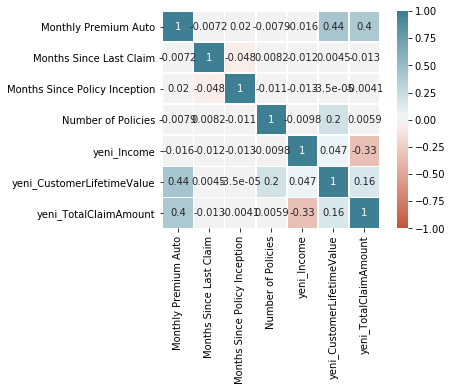

In [85]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=8976),
    square=True,annot=True, fmt=".2g",linewidth=.5)

In [86]:
from scipy.stats import pointbiserialr

In [87]:
bagımlı = Sayısal_df['yeni_response']
bagımsız=Sayısal_df['yeni_CustomerLifetimeValue']
ncsk=pointbiserialr(bagımsız, bagımlı)
print(ncsk)

PointbiserialrResult(correlation=-0.005923370519085184, pvalue=0.5747175892308082)


In [88]:
bagımlı = Sayısal_df['yeni_response']
bagımsız1=Sayısal_df['yeni_Income']
ncsk=pointbiserialr(bagımsız1, bagımlı)
print(ncsk)

PointbiserialrResult(correlation=0.08345248049703359, pvalue=2.3914090238574522e-15)


In [89]:
bagımlı = Sayısal_df['yeni_response']
bagımsız2=Sayısal_df['yeni_TotalClaimAmount']
ncsk=pointbiserialr(bagımsız2, bagımlı)
print(ncsk)

PointbiserialrResult(correlation=0.04811511763008477, pvalue=5.102781324453518e-06)


In [90]:
bagımlı = Sayısal_df['yeni_response']
bagımsız3=Sayısal_df['Monthly Premium Auto']
ncsk=pointbiserialr(bagımsız3, bagımlı)
print(ncsk)

PointbiserialrResult(correlation=-0.0020567917291834333, pvalue=0.8455204583529086)


In [91]:
bagımlı = Sayısal_df['yeni_response']
bagımsız4=Sayısal_df['Months Since Last Claim']
ncsk=pointbiserialr(bagımsız4, bagımlı)
print(ncsk)

PointbiserialrResult(correlation=-0.023132271045760926, pvalue=0.028409851295621652)


In [92]:
bagımlı = Sayısal_df['yeni_response']
bagımsız5=Sayısal_df['Months Since Policy Inception']
ncsk=pointbiserialr(bagımsız5, bagımlı)
print(ncsk)

PointbiserialrResult(correlation=4.317449738564698e-05, pvalue=0.9967367745476029)


In [93]:
bagımlı = Sayısal_df['yeni_response']
bagımsız6=Sayısal_df['Number of Policies']
ncsk=pointbiserialr(bagımsız6, bagımlı)
print(ncsk)

PointbiserialrResult(correlation=-0.018385471687808897, pvalue=0.08154756754067152)


In [94]:
from sklearn.metrics import matthews_corrcoef

In [95]:
bagımlı = Sayısal_df['yeni_response']
bagımsız8=Sayısal_df['yeni_gender']
phi=matthews_corrcoef(bagımsız8, bagımlı)
print(phi)

0.007010753208832886


In [96]:
myorder1=df["yeni_response"]
myorder2=df["yeni_state"]
mycrosstable=pd.crosstab(myorder1, myorder2)
nRows=mycrosstable.shape[0]
nCols=mycrosstable.shape[1]

C=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j-1
        if h>=0 and k>=0:
            for p in range (h+1):
                for q in range (k+1):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j+1
        if h<nRows and k<nCols:
            for p in range(h, nRows):
                for q in range (k, nCols):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
   
         
D=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j-1
        if h<nRows and k>=0:
            for p in range (h,nRows):
                for q in range (k+1):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j+1
        if h>=0 and k<nCols:
            for p in range(h+1):
                for q in range (k, nCols):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]

P=0
Q=0
for i in range(nRows):
    for j in range(nCols):
        P=P+C[i][j]*mycrosstable.iloc[i][j]
        Q=Q+D[i][j]*mycrosstable.iloc[i][j]

n=mycrosstable.sum().sum()
GKgamma=(P-Q)/(P+Q)
GKgamma

-0.0035243112158683983

In [97]:
myorder1=df["yeni_response"]
myorder2=df["yeni_coverage"]
mycrosstable=pd.crosstab(myorder1, myorder2)
nRows=mycrosstable.shape[0]
nCols=mycrosstable.shape[1]

C=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j-1
        if h>=0 and k>=0:
            for p in range (h+1):
                for q in range (k+1):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j+1
        if h<nRows and k<nCols:
            for p in range(h, nRows):
                for q in range (k, nCols):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
   
         
D=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j-1
        if h<nRows and k>=0:
            for p in range (h,nRows):
                for q in range (k+1):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j+1
        if h>=0 and k<nCols:
            for p in range(h+1):
                for q in range (k, nCols):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]

P=0
Q=0
for i in range(nRows):
    for j in range(nCols):
        P=P+C[i][j]*mycrosstable.iloc[i][j]
        Q=Q+D[i][j]*mycrosstable.iloc[i][j]

n=mycrosstable.sum().sum()
GKgamma=(P-Q)/(P+Q)
GKgamma

-0.018011369720785358

In [98]:
myorder1=df["yeni_response"]
myorder2=df["yeni_education"]
mycrosstable=pd.crosstab(myorder1, myorder2)
nRows=mycrosstable.shape[0]
nCols=mycrosstable.shape[1]

C=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j-1
        if h>=0 and k>=0:
            for p in range (h+1):
                for q in range (k+1):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j+1
        if h<nRows and k<nCols:
            for p in range(h, nRows):
                for q in range (k, nCols):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
   
         
D=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j-1
        if h<nRows and k>=0:
            for p in range (h,nRows):
                for q in range (k+1):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j+1
        if h>=0 and k<nCols:
            for p in range(h+1):
                for q in range (k, nCols):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]

P=0
Q=0
for i in range(nRows):
    for j in range(nCols):
        P=P+C[i][j]*mycrosstable.iloc[i][j]
        Q=Q+D[i][j]*mycrosstable.iloc[i][j]

n=mycrosstable.sum().sum()
GKgamma=(P-Q)/(P+Q)
GKgamma

0.01351140867251955

In [99]:
myorder1=df["yeni_response"]
myorder2=df["yeni_employmentstatus"]
mycrosstable=pd.crosstab(myorder1, myorder2)
nRows=mycrosstable.shape[0]
nCols=mycrosstable.shape[1]

C=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j-1
        if h>=0 and k>=0:
            for p in range (h+1):
                for q in range (k+1):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j+1
        if h<nRows and k<nCols:
            for p in range(h, nRows):
                for q in range (k, nCols):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
   
         
D=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j-1
        if h<nRows and k>=0:
            for p in range (h,nRows):
                for q in range (k+1):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j+1
        if h>=0 and k<nCols:
            for p in range(h+1):
                for q in range (k, nCols):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]

P=0
Q=0
for i in range(nRows):
    for j in range(nCols):
        P=P+C[i][j]*mycrosstable.iloc[i][j]
        Q=Q+D[i][j]*mycrosstable.iloc[i][j]

n=mycrosstable.sum().sum()
GKgamma=(P-Q)/(P+Q)
GKgamma

-0.019755634195544186

In [100]:
myorder1=df["yeni_response"]
myorder2=df["yeni_martialstatus"]
mycrosstable=pd.crosstab(myorder1, myorder2)
nRows=mycrosstable.shape[0]
nCols=mycrosstable.shape[1]

C=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j-1
        if h>=0 and k>=0:
            for p in range (h+1):
                for q in range (k+1):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j+1
        if h<nRows and k<nCols:
            for p in range(h, nRows):
                for q in range (k, nCols):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
   
         
D=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j-1
        if h<nRows and k>=0:
            for p in range (h,nRows):
                for q in range (k+1):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j+1
        if h>=0 and k<nCols:
            for p in range(h+1):
                for q in range (k, nCols):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]

P=0
Q=0
for i in range(nRows):
    for j in range(nCols):
        P=P+C[i][j]*mycrosstable.iloc[i][j]
        Q=Q+D[i][j]*mycrosstable.iloc[i][j]

n=mycrosstable.sum().sum()
GKgamma=(P-Q)/(P+Q)
GKgamma

-0.22654505850736298

In [101]:
myorder1=df["yeni_response"]
myorder2=df["yeni_policy"]
mycrosstable=pd.crosstab(myorder1, myorder2)
nRows=mycrosstable.shape[0]
nCols=mycrosstable.shape[1]

C=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j-1
        if h>=0 and k>=0:
            for p in range (h+1):
                for q in range (k+1):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j+1
        if h<nRows and k<nCols:
            for p in range(h, nRows):
                for q in range (k, nCols):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
   
         
D=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j-1
        if h<nRows and k>=0:
            for p in range (h,nRows):
                for q in range (k+1):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j+1
        if h>=0 and k<nCols:
            for p in range(h+1):
                for q in range (k, nCols):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]

P=0
Q=0
for i in range(nRows):
    for j in range(nCols):
        P=P+C[i][j]*mycrosstable.iloc[i][j]
        Q=Q+D[i][j]*mycrosstable.iloc[i][j]

n=mycrosstable.sum().sum()
GKgamma=(P-Q)/(P+Q)
GKgamma

-0.01457949020736006

In [102]:
myorder1=df["yeni_response"]
myorder2=df["yeni_policytype"]
mycrosstable=pd.crosstab(myorder1, myorder2)
nRows=mycrosstable.shape[0]
nCols=mycrosstable.shape[1]

C=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j-1
        if h>=0 and k>=0:
            for p in range (h+1):
                for q in range (k+1):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j+1
        if h<nRows and k<nCols:
            for p in range(h, nRows):
                for q in range (k, nCols):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
   
         
D=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j-1
        if h<nRows and k>=0:
            for p in range (h,nRows):
                for q in range (k+1):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j+1
        if h>=0 and k<nCols:
            for p in range(h+1):
                for q in range (k, nCols):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]

P=0
Q=0
for i in range(nRows):
    for j in range(nCols):
        P=P+C[i][j]*mycrosstable.iloc[i][j]
        Q=Q+D[i][j]*mycrosstable.iloc[i][j]

n=mycrosstable.sum().sum()
GKgamma=(P-Q)/(P+Q)
GKgamma

0.00023595823539233557

In [103]:
myorder1=df["yeni_response"]
myorder2=df["yeni_renewoffertype"]
mycrosstable=pd.crosstab(myorder1, myorder2)
nRows=mycrosstable.shape[0]
nCols=mycrosstable.shape[1]

C=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j-1
        if h>=0 and k>=0:
            for p in range (h+1):
                for q in range (k+1):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j+1
        if h<nRows and k<nCols:
            for p in range(h, nRows):
                for q in range (k, nCols):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
   
         
D=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j-1
        if h<nRows and k>=0:
            for p in range (h,nRows):
                for q in range (k+1):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j+1
        if h>=0 and k<nCols:
            for p in range(h+1):
                for q in range (k, nCols):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]

P=0
Q=0
for i in range(nRows):
    for j in range(nCols):
        P=P+C[i][j]*mycrosstable.iloc[i][j]
        Q=Q+D[i][j]*mycrosstable.iloc[i][j]

n=mycrosstable.sum().sum()
GKgamma=(P-Q)/(P+Q)
GKgamma

-0.3145955035803195

In [104]:
myorder1=df["yeni_response"]
myorder2=df["yeni_saleschannel"]
mycrosstable=pd.crosstab(myorder1, myorder2)
nRows=mycrosstable.shape[0]
nCols=mycrosstable.shape[1]

C=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j-1
        if h>=0 and k>=0:
            for p in range (h+1):
                for q in range (k+1):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j+1
        if h<nRows and k<nCols:
            for p in range(h, nRows):
                for q in range (k, nCols):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
   
         
D=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j-1
        if h<nRows and k>=0:
            for p in range (h,nRows):
                for q in range (k+1):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j+1
        if h>=0 and k<nCols:
            for p in range(h+1):
                for q in range (k, nCols):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]

P=0
Q=0
for i in range(nRows):
    for j in range(nCols):
        P=P+C[i][j]*mycrosstable.iloc[i][j]
        Q=Q+D[i][j]*mycrosstable.iloc[i][j]

n=mycrosstable.sum().sum()
GKgamma=(P-Q)/(P+Q)
GKgamma

-0.2057249737109759

In [105]:
myorder1=df["yeni_response"]
myorder2=df["yeni_locationcode"]
mycrosstable=pd.crosstab(myorder1, myorder2)
nRows=mycrosstable.shape[0]
nCols=mycrosstable.shape[1]

C=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j-1
        if h>=0 and k>=0:
            for p in range (h+1):
                for q in range (k+1):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j+1
        if h<nRows and k<nCols:
            for p in range(h, nRows):
                for q in range (k, nCols):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
   
         
D=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j-1
        if h<nRows and k>=0:
            for p in range (h,nRows):
                for q in range (k+1):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j+1
        if h>=0 and k<nCols:
            for p in range(h+1):
                for q in range (k, nCols):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]

P=0
Q=0
for i in range(nRows):
    for j in range(nCols):
        P=P+C[i][j]*mycrosstable.iloc[i][j]
        Q=Q+D[i][j]*mycrosstable.iloc[i][j]

n=mycrosstable.sum().sum()
GKgamma=(P-Q)/(P+Q)
GKgamma

-0.0029315316654551686

In [106]:
myorder1=df["yeni_response"]
myorder2=df["yeni_vehicleclass"]
mycrosstable=pd.crosstab(myorder1, myorder2)
nRows=mycrosstable.shape[0]
nCols=mycrosstable.shape[1]

C=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j-1
        if h>=0 and k>=0:
            for p in range (h+1):
                for q in range (k+1):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j+1
        if h<nRows and k<nCols:
            for p in range(h, nRows):
                for q in range (k, nCols):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
   
         
D=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j-1
        if h<nRows and k>=0:
            for p in range (h,nRows):
                for q in range (k+1):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j+1
        if h>=0 and k<nCols:
            for p in range(h+1):
                for q in range (k, nCols):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]

P=0
Q=0
for i in range(nRows):
    for j in range(nCols):
        P=P+C[i][j]*mycrosstable.iloc[i][j]
        Q=Q+D[i][j]*mycrosstable.iloc[i][j]

n=mycrosstable.sum().sum()
GKgamma=(P-Q)/(P+Q)
GKgamma

0.04012364987947817

In [107]:
myorder1=df["yeni_response"]
myorder2=df["yeni_vehiclesize"]
mycrosstable=pd.crosstab(myorder1, myorder2)
nRows=mycrosstable.shape[0]
nCols=mycrosstable.shape[1]

C=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j-1
        if h>=0 and k>=0:
            for p in range (h+1):
                for q in range (k+1):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j+1
        if h<nRows and k<nCols:
            for p in range(h, nRows):
                for q in range (k, nCols):
                    C[i][j]=C[i][j]+list(mycrosstable.iloc[p])[q]
   
         
D=[[0 for x in range(nCols)] for y in range(nRows)]
#top left part
for i in range(nRows):
    for j in range(nCols):
        h=i+1
        k=j-1
        if h<nRows and k>=0:
            for p in range (h,nRows):
                for q in range (k+1):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]
#bottom right part                        
for i in range(nRows):
    for j in range(nCols):
        h=i-1
        k=j+1
        if h>=0 and k<nCols:
            for p in range(h+1):
                for q in range (k, nCols):
                    D[i][j]=D[i][j]+list(mycrosstable.iloc[p])[q]

P=0
Q=0
for i in range(nRows):
    for j in range(nCols):
        P=P+C[i][j]*mycrosstable.iloc[i][j]
        Q=Q+D[i][j]*mycrosstable.iloc[i][j]

n=mycrosstable.sum().sum()
GKgamma=(P-Q)/(P+Q)
GKgamma

-0.15653332118421723

In [108]:
Sayısal_df

,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Policies,yeni_gender,yeni_response,yeni_state,yeni_coverage,yeni_education,yeni_employmentstatus,...,yeni_martialstatus,yeni_policytype,yeni_policy,yeni_renewoffertype,yeni_saleschannel,yeni_vehicleclass,yeni_vehiclesize,yeni_Income,yeni_CustomerLifetimeValue,yeni_TotalClaimAmount
0,69,32,5,1,0,0,4,0,0,1,...,1,0,2,0,0,5,1,4.750316,3.441462,2.585248
1,94,13,42,8,0,0,0,1,0,4,...,2,1,5,2,0,0,1,0.000000,3.843827,3.053641
2,108,18,38,2,0,0,2,2,0,1,...,1,1,5,0,0,5,1,4.688135,4.110166,2.753179
3,106,18,65,7,1,0,1,0,0,4,...,1,0,1,0,2,3,1,0.000000,3.883426,2.724179
4,73,12,44,1,1,0,4,0,0,1,...,2,1,3,0,0,0,1,4.641841,3.449277,2.140291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,73,18,89,2,1,0,1,0,0,1,...,1,1,3,1,3,0,1,4.856983,4.369327,2.297180
8972,79,14,28,1,0,1,1,1,1,1,...,0,0,2,0,1,0,1,4.334554,3.490873,2.578868
8973,85,9,37,2,1,0,1,1,0,4,...,2,0,1,0,1,0,1,0.000000,3.911897,2.898058
8974,96,34,3,3,1,0,1,1,1,1,...,1,1,4,2,1,0,0,4.341276,3.876474,2.839604


In [109]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [110]:
y = Sayısal_df["yeni_response"]
X = Sayısal_df.drop("yeni_response", axis = 1)

In [111]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3,random_state=42)

In [112]:
?SVC


Init signature:
SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)
Docstring:     
C-Support Vector Classification.

The implementation is based on libsvm. The fit time scales at least
quadratically with the number of samples and may be impractical
beyond tens of thousands of samples. For large datasets
consider using :class:`~sklearn.svm.LinearSVC` or
:class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
:class:`~sklearn.kernel_approximation.Nystroem` transformer.

The multiclass support is handled according to a one-vs-one scheme.

For details on the precise mathematical formulation of the provided
kernel functions and how `gamma`, `coef0` and `degree` affect each
other, see the corresponding section in the narrati

In [113]:
svc_model=SVC(kernel="sigmoid",C=1).fit(X_train, y_train)   


In [114]:
predt=svc_model.predict(X_test)
prednv=svc_model.predict(X_train)

In [115]:
print(confusion_matrix(y_train,prednv))

[[4596  766]
 [ 801  120]]


In [116]:
print(confusion_matrix(y_test,predt))

[[1960  370]
 [ 304   59]]


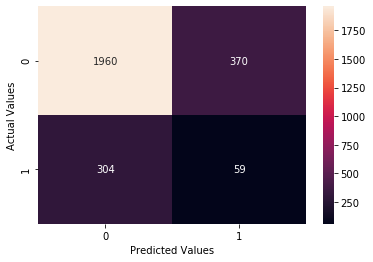

In [119]:
print(confusion_matrix(y_test,pred))
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

cm1 = cm(y_test, pred)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [125]:
print(accuracy_score(y_test,predt))

0.7497215001856665


In [117]:
print(classification_report(y_test,predt))#test

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      2330
           1       0.14      0.16      0.15       363

    accuracy                           0.75      2693
   macro avg       0.50      0.50      0.50      2693
weighted avg       0.77      0.75      0.76      2693



In [118]:
print(classification_report(y_train,prednv))#train

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      5362
           1       0.14      0.13      0.13       921

    accuracy                           0.75      6283
   macro avg       0.49      0.49      0.49      6283
weighted avg       0.75      0.75      0.75      6283



In [121]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from bioinfokit.visuz import stat

In [122]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=np.round(predt))
auc = roc_auc_score(y_true=y_test, y_score=np.round(predt))

In [123]:
stat.roc(fpr=fpr, tpr=tpr, auc=auc, shade_auc=True, per_class=True, legendpos='upper center', legendanchor=(0.5, 1.08), legendcols=3)